<a href="https://colab.research.google.com/github/TatkovDmitriy/Yandex_Practicum/blob/Product_analyses/%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-931151603.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="month", y="revenue", ci=None, estimator='sum', ls='-', marker='o')


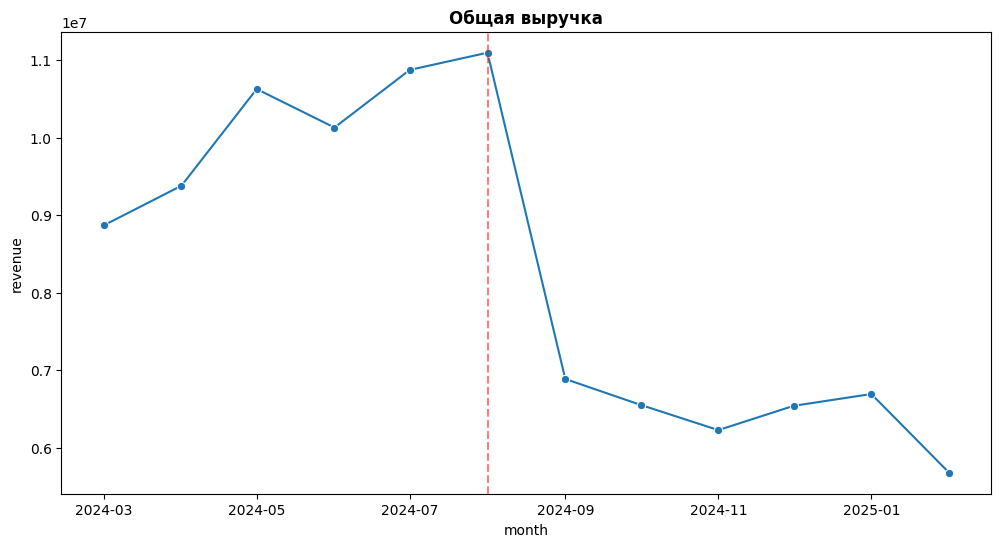

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Загрузка и объединение данных
path_products = 'https://code.s3.yandex.net/datasets/PA_4_4_3_products.csv'
path_users = 'https://code.s3.yandex.net/datasets/PA_4_4_3_users.csv'
path_transactions = 'https://code.s3.yandex.net/datasets/PA_4_4_3_transactions.csv'

products = pd.read_csv(path_products)
users = pd.read_csv(path_users)
transactions = pd.read_csv(path_transactions)

#Объедините данные в единый датафрейм df
df = pd.merge(transactions, users, on='user_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')

# 2. Подсчёт метрик
# Создание колонки с месяцем
df['month'] = pd.to_datetime(df['date']).dt.to_period('M').dt.to_timestamp()
# Удаление последнего неполного месяца
df = df[df['month'] < df['month'].max()]

# Расчёт колонки с выручкой
df['revenue'] = df['price'] * df['quantity']

plt.figure(figsize=(12, 6))

# 3. Визуальный анализ
sns.lineplot(data=df, x="month", y="revenue", ci=None, estimator='sum', ls='-', marker='o')
plt.title(f"Общая выручка", fontweight='bold')

# Добавляем вертикальную пунктирную линию — дата начала кризиса.
crysis_start_date = "2024-08-01"
plt.axvline(pd.to_datetime(crysis_start_date), color="red", linestyle="--", alpha=0.5)
plt.show()


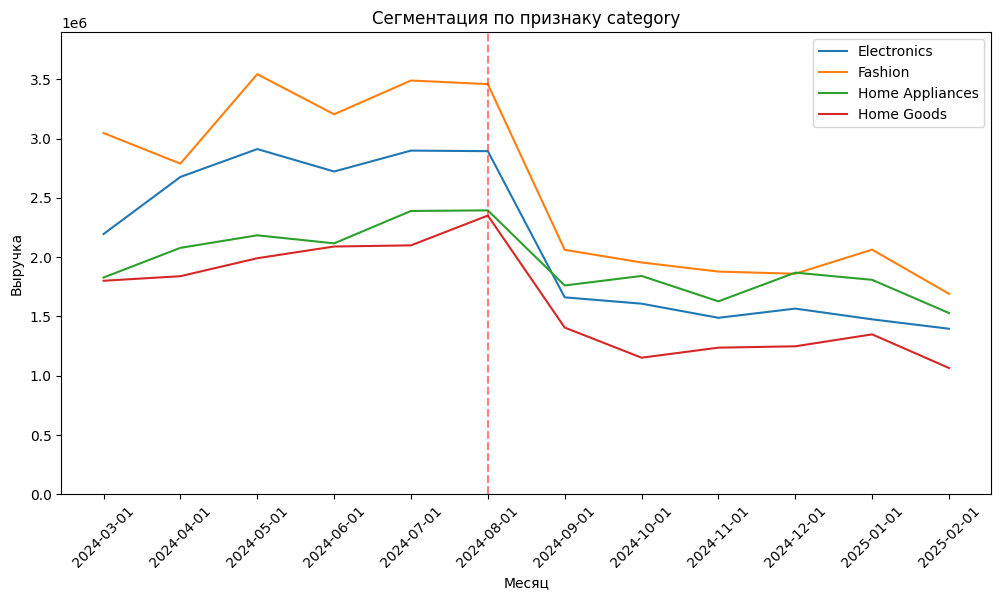

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_merged_df.csv')

# Выбор признака сегментации
segmentation_attribute = "category"

# Группировка данных по месяцам и категориям, суммирование выручки
df_gp = df.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()

# Получение всех уникальных сегментов
segments = df_gp[segmentation_attribute].unique()

plt.figure(figsize=(12, 6))
# Для каждого уникального сегмента строим линейный график
for segment in segments:
   df_plot = df_gp[df_gp[segmentation_attribute] == segment]
   plt.plot(df_plot['month'], df_plot['revenue'], label=segment)

# Устанавливаем минимальные и максимальные значения для оси y
plt.ylim(0, df_gp['revenue'].max() * 1.1)

# Добавляем вертикальную пунктирную линию в августе 2024 — дата начала кризиса.
plt.axvline("2024-08-01", color="red", linestyle="--", alpha=0.5)

# Устанавливаем заголовок
plt.title(f"Сегментация по признаку {segmentation_attribute}")

# Устанавливаем подписи осей
plt.xlabel("Месяц")
plt.ylabel("Выручка")
plt.xticks(rotation=45)

# Добавляем легенду
plt.legend()
plt.show()


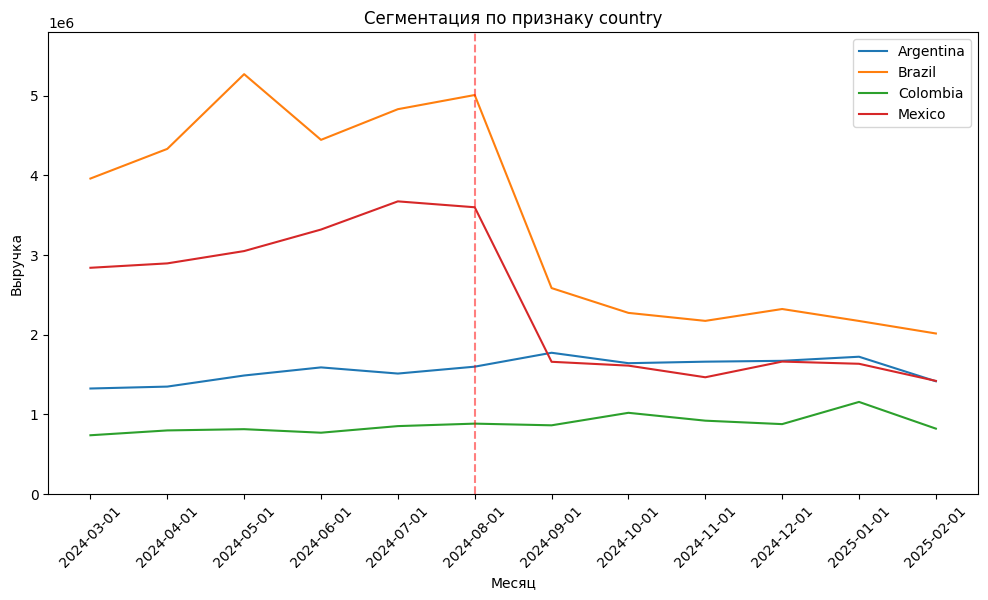

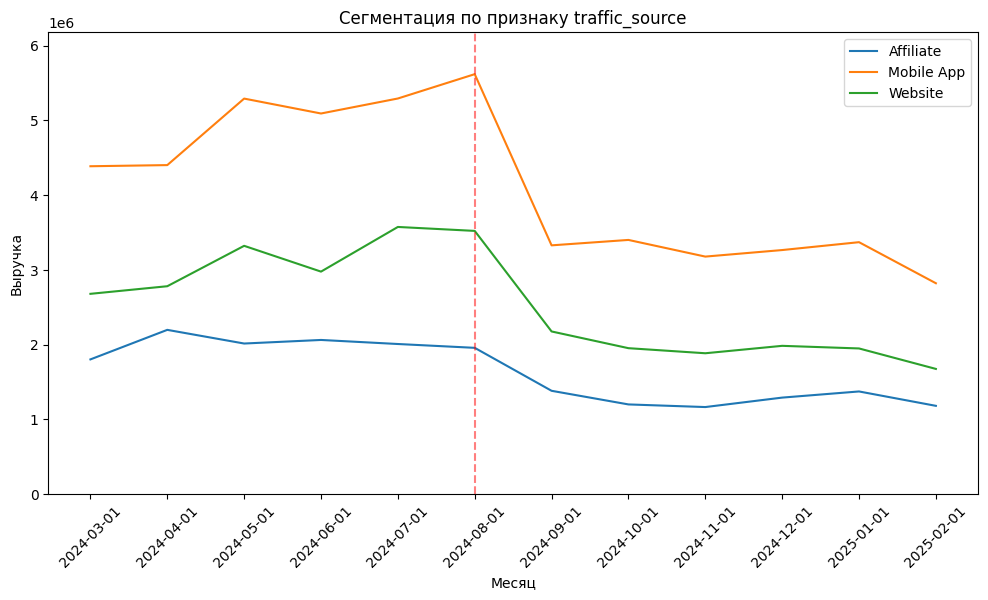

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_merged_df.csv')


# Определение переиспользуемой функции для построения графиков по сегментам
def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   # Логика построения линейных графиков для каждого уникального сегмента
   # Группировка данных по месяцам и категориям, суммирование выручки
   df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()

   # Получение всех уникальных сегментов
   segments = df_gp[segmentation_attribute].unique()

   # Указываем размеры графика
   plt.figure(figsize=(12, 6))

   # Для каждого уникального сегмента строим линейный график
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["month"], df_plot["revenue"], label=segment)

   # Устанавливаем минимальные и максимальные значения для оси y
   plt.ylim(0, df_gp["revenue"].max() * 1.1)

   # Добавляем вертикальную пунктирную линию в августе 2024 - дата начала кризиса.
   plt.axvline("2024-08-01", color="red", linestyle="--", alpha=0.5)

   # Устанавливаем заголовок графика
   plt.title(f"Сегментация по признаку {segmentation_attribute}")

   # Устанавливаем подписи осей
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")

   # Добавляем легенду
   plt.legend()
   plt.xticks(rotation=45)
   plt.show()


# Вызов функции для признака страны
plot_segments(df, "country")

# Вызов функции для признака источника трафика
plot_segments(df, "traffic_source")


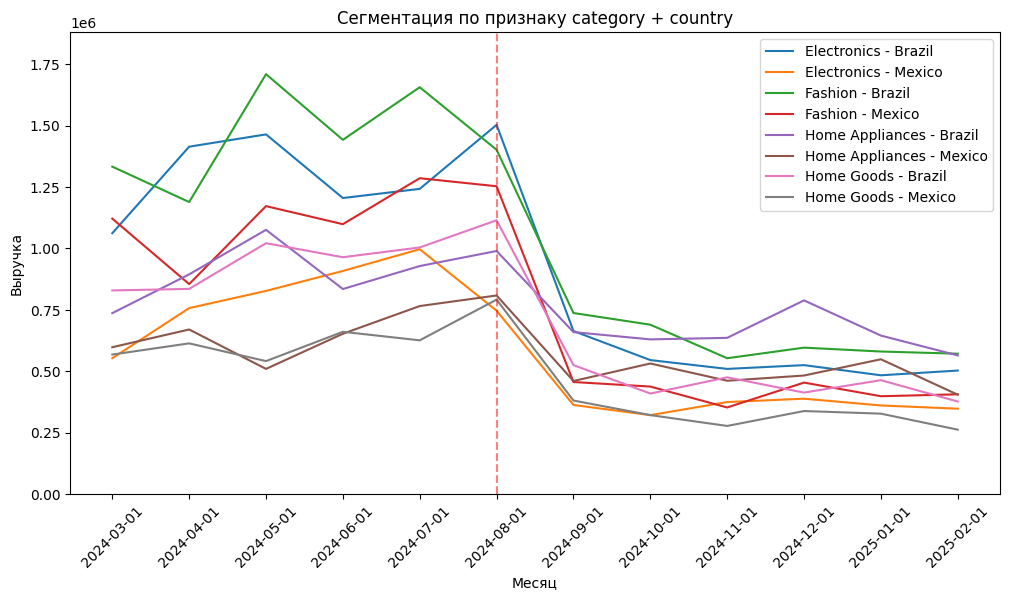

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_merged_df.csv')

def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   # Логика построения линейных графиков для каждого уникального сегмента
   # Группировка данных по месяцам и категориям, суммирование выручки
   df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()

   # Получении всех уникальных сегментов
   segments = df_gp[segmentation_attribute].unique()

   # Указываем размеры графика
   plt.figure(figsize=(12, 6))

   # Для каждого уникального сегмента строим линейный график
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot['month'], df_plot['revenue'], label=segment)

   # Устанавливаем минимальные и максимальные значения для оси y
   plt.ylim(0, df_gp['revenue'].max() * 1.1)

   # Добавляем вертикальную пунктирную линию в августе 2024 - дата начала кризиса.
   plt.axvline("2024-08-01", color="red", linestyle="--", alpha=0.5)
   # Устанавливаем заголовок графика
   plt.title(f"Сегментация по признаку {segmentation_attribute}")

   # Устанавливаем подписи осей
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")

   # Добавляем легенду
   plt.legend()
   plt.xticks(rotation=45)
   plt.show()


# Фильтруем данные по странам Мексика и Бразилия
df_mexico_brasil = df[df['country'].isin(['Mexico', 'Brazil'])].copy()

# Задаём названия атрибутов для комбинированного признака
first_attr = "category"
second_attr = "country"
combine_attr = f"{first_attr} + {second_attr}"

# Создаём комбинированный признак "страна + категория"
df_mexico_brasil[combine_attr] = df_mexico_brasil[first_attr] + ' - ' + df_mexico_brasil[second_attr]

# Вызов функции для комбинированного признака страны и категории
plot_segments(df_mexico_brasil, combine_attr)


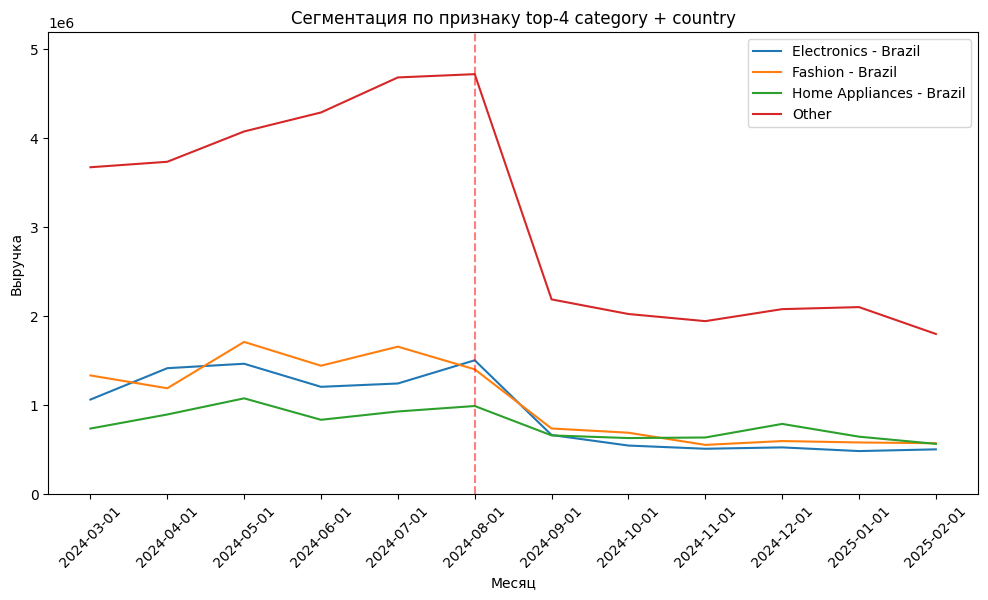

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_merged_df.csv')


def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   # Логика построения линейных графиков для каждого уникального сегмента
   # Группировка данных по месяцам и категориям, суммирование выручки
   df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()

   # Получении всех уникальных сегментов
   segments = df_gp[segmentation_attribute].unique()

   # Указываем размеры графика
   plt.figure(figsize=(12, 6))

   # Для каждого уникального сегмента строим линейный график
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot['month'], df_plot['revenue'], label=segment)

   # Устанавливаем минимальные и максимальные значения для оси y
   plt.ylim(0, df_gp['revenue'].max() * 1.1)

   # Добавляем вертикальную пунктирную линию в августе 2024 - дата начала кризиса.
   plt.axvline("2024-08-01", color="red", linestyle="--", alpha=0.5)
   # Устанавливаем заголовок графика
   plt.title(f"Сегментация по признаку {segmentation_attribute}")

   # Устанавливаем подписи осей
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")

   # Добавляем легенду
   plt.legend()
   plt.xticks(rotation=45)
   plt.show()


# Фильтруем данные по странам Мексика и Бразилия
df_mexico_brasil = df[df['country'].isin(['Mexico', 'Brazil'])].copy()

# Задаём названия атрибутов для комбинированного признака
first_attr = "category"
second_attr = "country"
combine_attr = f"{first_attr} + {second_attr}"

# Создаём комбинированный признак "страна + категория"
df_mexico_brasil[combine_attr] = df_mexico_brasil[first_attr] + ' - ' + df_mexico_brasil[second_attr]

# Расчёт топ-3 сегментов по выручке
top_3_segments = df_mexico_brasil.groupby(combine_attr)['revenue'].sum().nlargest(3)

# Создаём новый признак, который будет содержать только топ-3 сегмента, остальные - 'Other'
df_mexico_brasil[f'top-4 {combine_attr}'] = df_mexico_brasil[combine_attr].apply(
   lambda x: x if x in top_3_segments.index else 'Other'
)

# Вызов функции для комбинированного признака страны и категории с учётом сегмента Other
plot_segments(df_mexico_brasil, f"top-4 {combine_attr}")


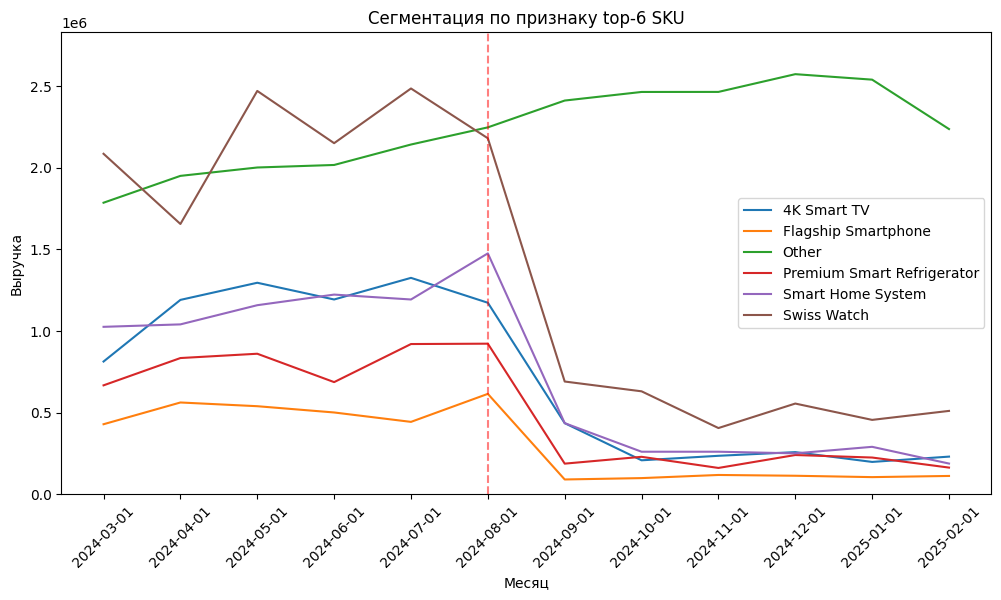

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_merged_df.csv')


def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()

   plt.figure(figsize=(12, 6))
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot['month'], df_plot['revenue'], label=segment)

   plt.ylim(0, df_gp['revenue'].max() * 1.1)
   plt.axvline("2024-08-01", color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.xticks(rotation=45)
   plt.show()

# Фильтруем данные по странам Мексика и Бразилия
df_mexico_brasil = df[df['country'].isin(['Mexico', 'Brazil'])].copy()

# Расчёт топ-5 SKU сегментов по выручке
top_5_sku = df_mexico_brasil.groupby('sku')['revenue'].sum().nlargest(5)

# Создаём новый признак, который будет содержать только топ-5 SKU, остальные объединяем в 'Other'
df_mexico_brasil['top-6 SKU'] = df_mexico_brasil['sku'].apply(
   lambda x: x if x in top_5_sku.index else 'Other'
)

# Вызов функции для признака SKU с объединением небольших сегментов в 'Other'
plot_segments(df_mexico_brasil, 'top-6 SKU')


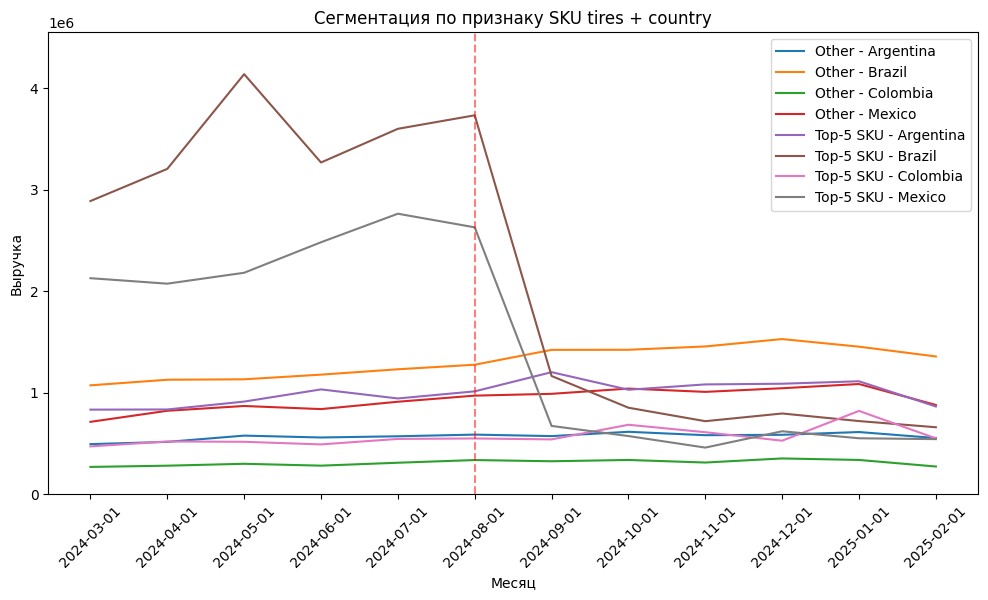

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_merged_df.csv')


def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()

   plt.figure(figsize=(12, 6))
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot['month'], df_plot['revenue'], label=segment)

   plt.ylim(0, df_gp['revenue'].max() * 1.1)
   plt.axvline("2024-08-01", color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.xticks(rotation=45)
   plt.show()


# Расчёт топ-5 SKU сегментов по выручке по всему датасету
top_5_global_sku = df.groupby('sku')['revenue'].sum().nlargest(5)

# Создаём новый бинарный признак: топ-5 SKU или Other
df["SKU tires"] = df["sku"].apply(lambda x: "Top-5 SKU" if x in top_5_global_sku.index else "Other")

# Задаём названия атрибутов для комбинированного признака
first_attr = "SKU tires"
second_attr = "country"
combine_attr = f"{first_attr} + {second_attr}"

# Создаём комбинированный признак "SKU tires + страна"
# Создаём комбинированный признак "SKU tires + страна"
df[combine_attr] = df[first_attr] + " - " + df[second_attr]


# Вызов функции для комбинированного признака
plot_segments(df, combine_attr)


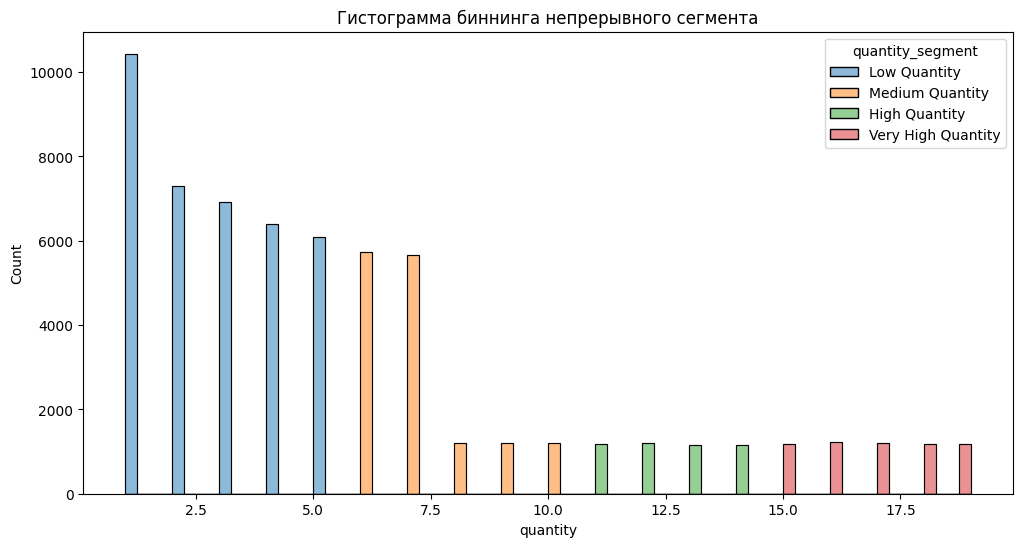

/tmp/ipython-input-8-4008781295.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()


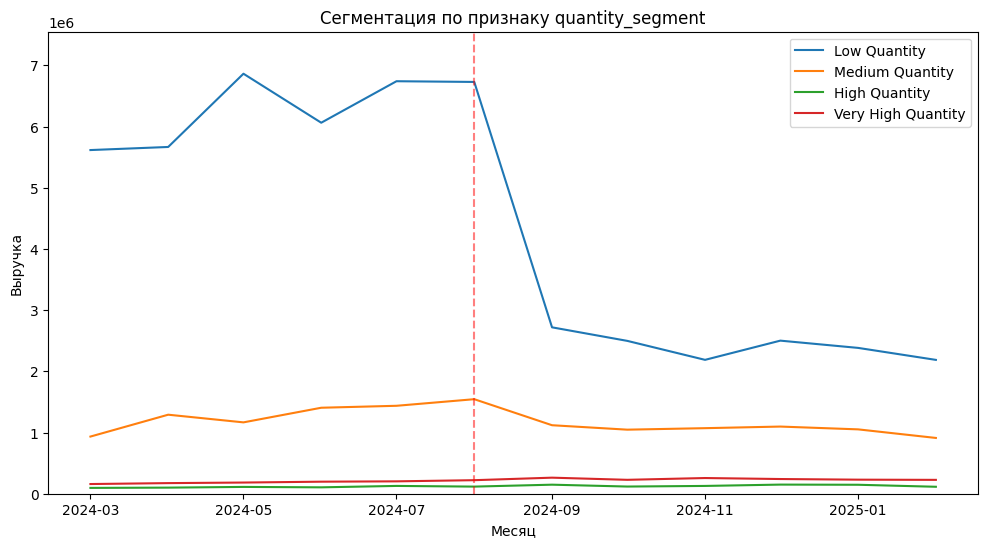

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_mexico_brasil = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_mexico_brasil_df.csv')
df_mexico_brasil["month"] = df_mexico_brasil["month"].values.astype("datetime64[M]")


def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()

   plt.figure(figsize=(12, 6))

   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["month"], df_plot["revenue"], label=segment)

   plt.ylim(0, df_gp["revenue"].max() * 1.1)
   plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.show()

labels = ["Low Quantity", "Medium Quantity", "High Quantity", "Very High Quantity"]
colors = ["green", "yellow", "brown", "red"]

# Задаём размер фигуры, построенной вне функции
plt.figure(figsize=(12, 6))
df_mexico_brasil["quantity_segment"] = pd.cut(
   df_mexico_brasil["quantity"], bins=4, labels=labels)

# Строим гистограмму непрерывного признака, разделённого на сегменты
sns.histplot(data=df_mexico_brasil, x="quantity", hue="quantity_segment")
# Настраиваем отображение
plt.title("Гистограмма биннинга непрерывного сегмента")
plt.show()

# Вызываем функцию для бинаризованного признака количества товара
plot_segments(df_mexico_brasil, "quantity_segment")

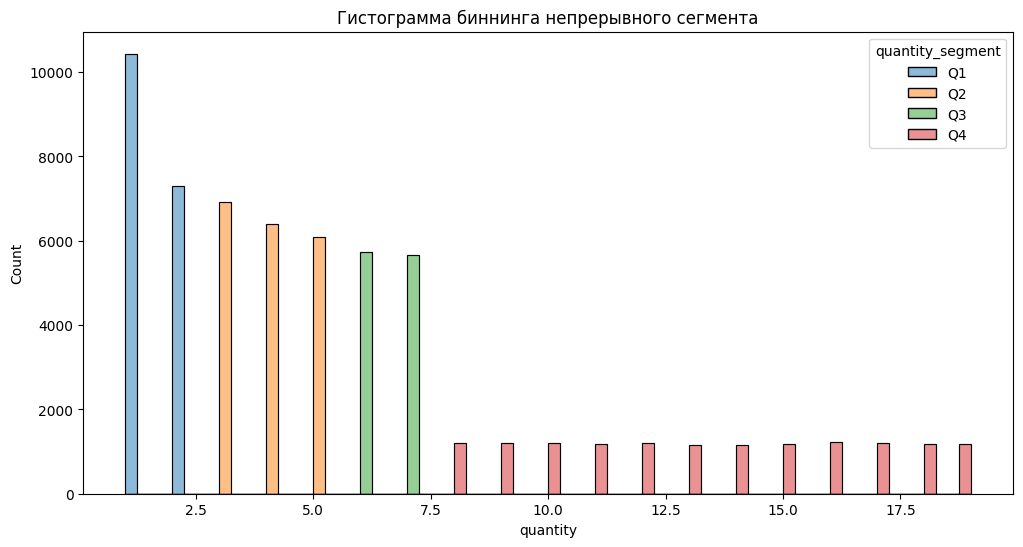

/tmp/ipython-input-9-2382904537.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()


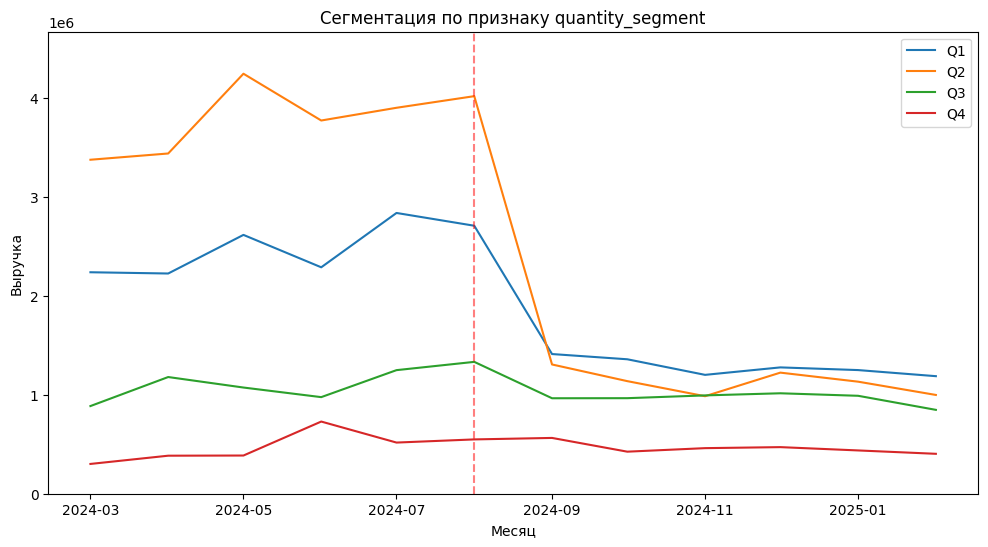

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_mexico_brasil = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_mexico_brasil_df.csv')
df_mexico_brasil["month"] = df_mexico_brasil["month"].values.astype("datetime64[M]")


def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()

   plt.figure(figsize=(12, 6))

   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["month"], df_plot["revenue"], label=segment)

   plt.ylim(0, df_gp["revenue"].max() * 1.1)
   plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.show()


labels = ["Q1", "Q2", "Q3", "Q4"]

# Задаём размер фигуры, построенной вне функции
plt.figure(figsize=(12, 6))
df_mexico_brasil["quantity_segment"] = pd.qcut(
   df_mexico_brasil["quantity"], q=4, labels=labels
)

# Строим гистограмму непрерывного признака, разделённого на сегменты
sns.histplot(data=df_mexico_brasil, x="quantity", hue="quantity_segment")
# Настраиваем отображение
plt.title("Гистограмма биннинга непрерывного сегмента")
plt.show()

# Визуализируем динамику выручки для сегментированного непрерывного признака
plot_segments(df_mexico_brasil, "quantity_segment")

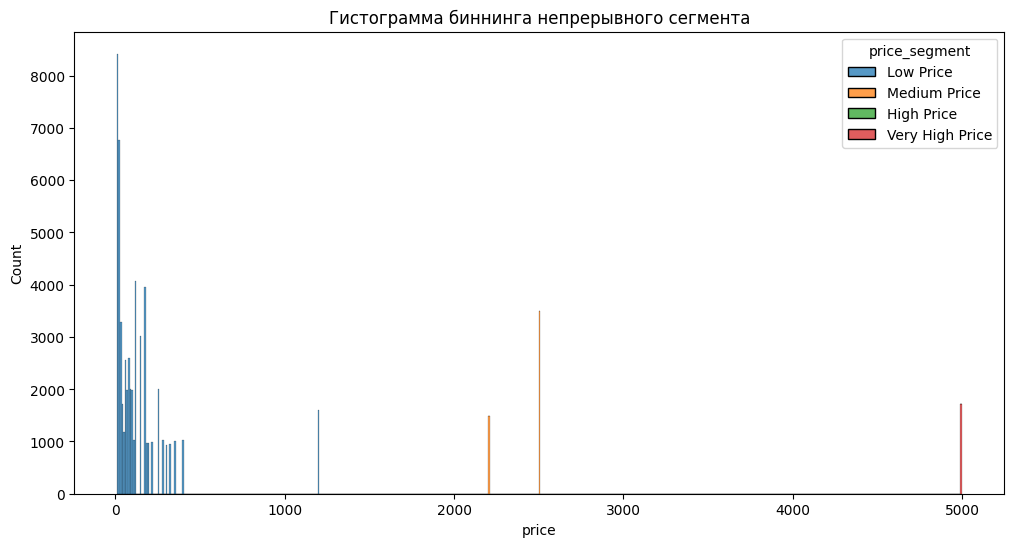

/tmp/ipython-input-10-2703086030.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()


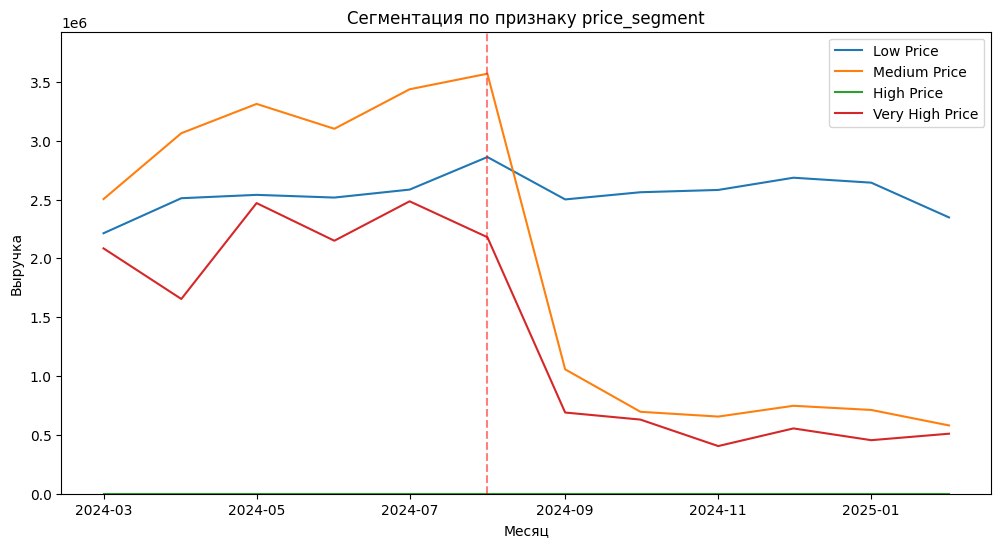

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_mexico_brasil = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_mexico_brasil_df.csv')
df_mexico_brasil["month"] = df_mexico_brasil["month"].values.astype("datetime64[M]")

def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()
   plt.figure(figsize=(12, 6))
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["month"], df_plot["revenue"], label=segment)

   plt.ylim(0, df_gp["revenue"].max() * 1.1)
   plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.show()

def plot_segments_histogram(df: pd.DataFrame, segmentation_attribute: str):
   attribute = segmentation_attribute.replace("_segment", "")
   plt.figure(figsize=(12, 6))
   sns.histplot(data=df, x=attribute, hue=segmentation_attribute, multiple="stack")
   plt.title("Гистограмма биннинга непрерывного сегмента")
   plt.show()

# Разделите признак цены на четыре равных сегмента и создайте новую колонку
labels = ["Low Price", "Medium Price", "High Price", "Very High Price"]
df_mexico_brasil["price_segment"] = pd.cut(df_mexico_brasil["price"], bins=4, labels=labels)

# Постройте гистограмму непрерывного признака
plot_segments_histogram(df_mexico_brasil, "price_segment")

# Визуализируйте динамику выручки для сегментированного непрерывного признака
plot_segments(df_mexico_brasil, "price_segment")


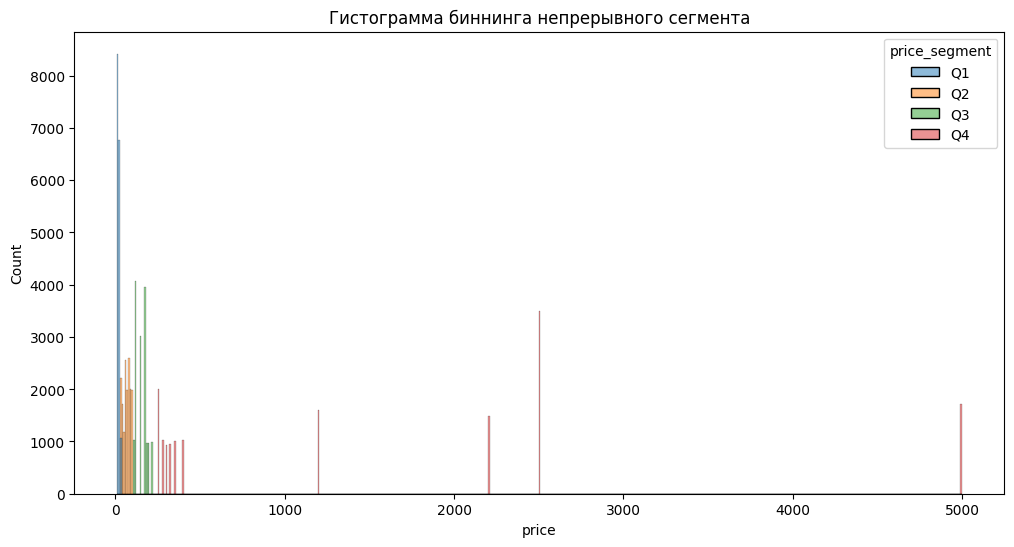

/tmp/ipython-input-11-3343407730.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()


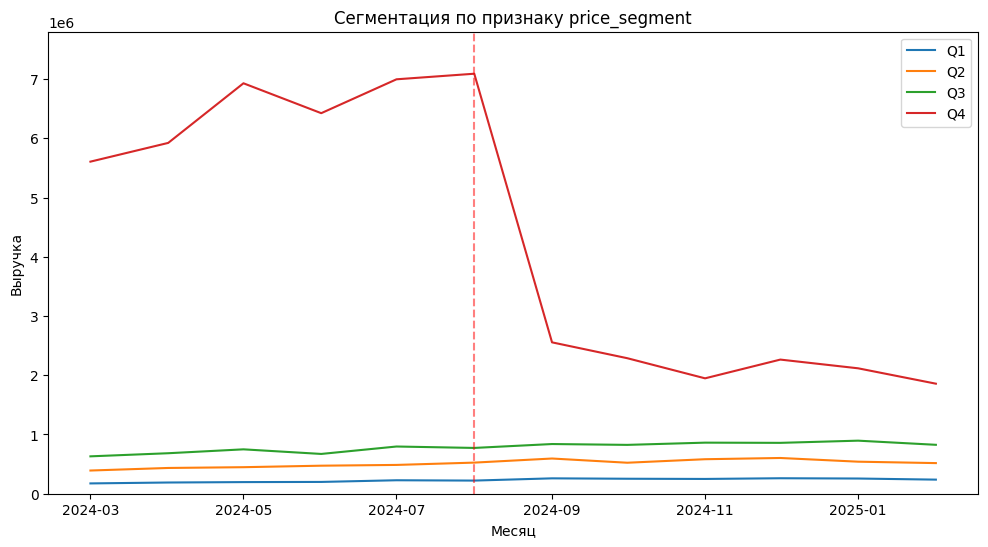

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Загружаем и подготавливаем данные
df_mexico_brasil = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_mexico_brasil_df.csv')
df_mexico_brasil["month"] = df_mexico_brasil["month"].values.astype("datetime64[M]")

# Функция для построения линейного графика
def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()
   plt.figure(figsize=(12, 6))
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["month"], df_plot["revenue"], label=segment)

   plt.ylim(0, df_gp["revenue"].max() * 1.1)
   plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.show()

# Функция для построения гистограммы
def plot_segments_histogram(df: pd.DataFrame, segmentation_attribute: str):
   attribute = segmentation_attribute.replace("_segment", "")
   plt.figure(figsize=(12, 6))
   sns.histplot(data=df, x=attribute, hue=segmentation_attribute)
   plt.title("Гистограмма биннинга непрерывного сегмента")
   plt.show()

# Биннинг по квартилям
labels = ["Q1", "Q2", "Q3", "Q4"]
df_mexico_brasil["price_segment"] = pd.qcut(df_mexico_brasil["price"], q=4, labels=labels)

# Визуализация
plot_segments_histogram(df_mexico_brasil, "price_segment")
plot_segments(df_mexico_brasil, "price_segment")


/tmp/ipython-input-12-1900722367.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_segments = df_users_revenue.groupby("revenue_segment", as_index=False)["total_user_revenue"].sum()


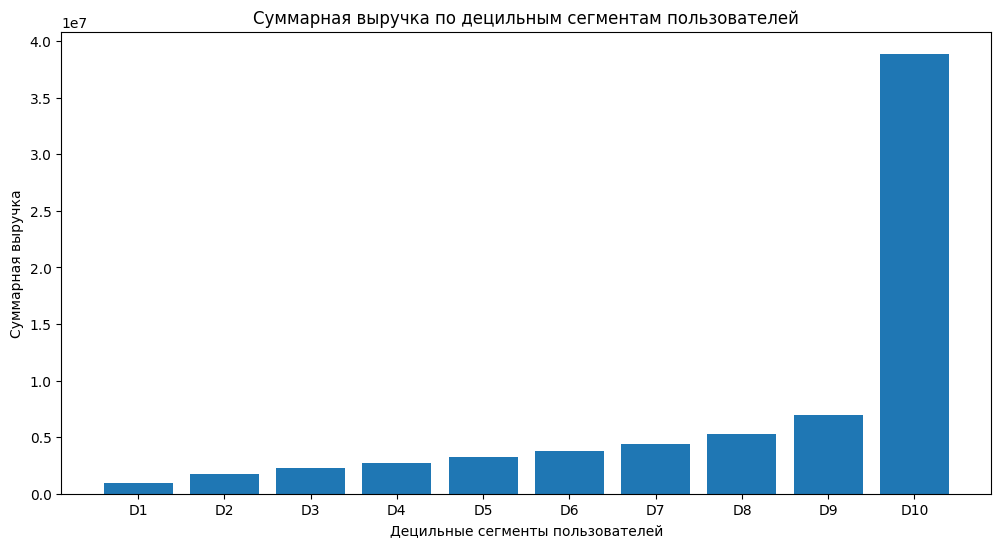

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_mexico_brasil = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_mexico_brasil_df.csv')
df_mexico_brasil["month"] = df_mexico_brasil["month"].values.astype("datetime64[M]")

# Сгруппируйте данные по пользователям и рассчитайте их суммарную выручку
df_users_revenue = df_mexico_brasil.groupby("user_id", as_index=False)["revenue"].sum()
df_users_revenue.rename(columns={"revenue": "total_user_revenue"}, inplace=True)

# Разделите непрерывный признак выручки на сегменты по 10% пользователей в каждом
labels = [f"D{i}" for i in range(1, 11)]
df_users_revenue["revenue_segment"] = pd.qcut(df_users_revenue["total_user_revenue"], q=10, labels=labels)

# Рассчитайте суммарную выручку для каждого из 10 новых сегментов
revenue_by_segments = df_users_revenue.groupby("revenue_segment", as_index=False)["total_user_revenue"].sum()

# Укажите размер фигуры
plt.figure(figsize=(12, 6))
# Постройте столбчатую диаграмму
plt.bar(revenue_by_segments["revenue_segment"], revenue_by_segments["total_user_revenue"])

# Добавьте подписи осей
plt.xlabel("Децильные сегменты пользователей")
plt.ylabel("Суммарная выручка")
plt.title("Суммарная выручка по децильным сегментам пользователей")
plt.show()


/tmp/ipython-input-13-958326925.py:24: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_users_revenue = df_mexico_brasil.groupby('user_id', as_index=False).agg({'revenue': sum})


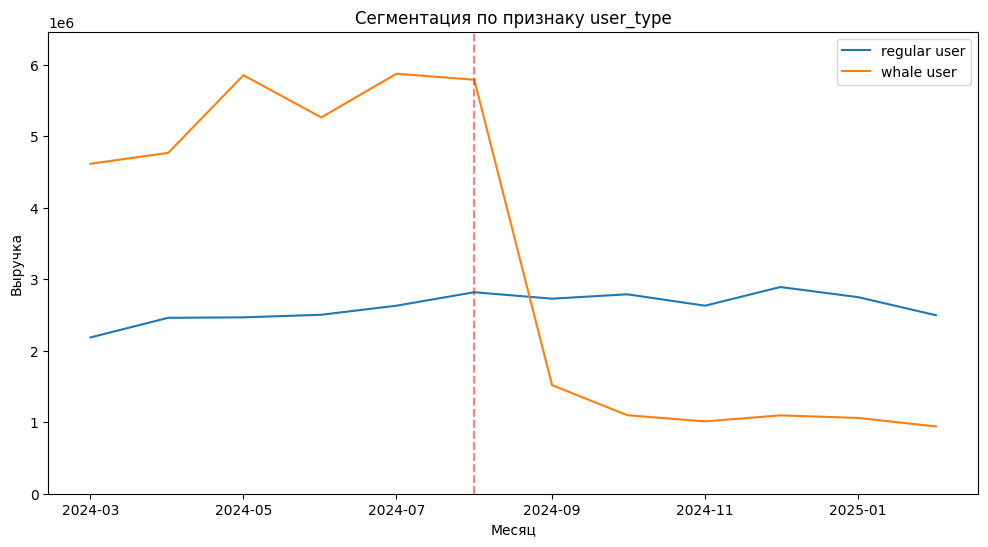

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_mexico_brasil = pd.read_csv('https://code.s3.yandex.net/datasets/PA_4_4_3_mexico_brasil_df.csv')
df_mexico_brasil["month"] = df_mexico_brasil["month"].values.astype("datetime64[M]")

def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
    df_gp = data.groupby(["month", segmentation_attribute], as_index=False)["revenue"].sum()
    segments = df_gp[segmentation_attribute].unique()
    plt.figure(figsize=(12, 6))
    for segment in segments:
        df_plot = df_gp[df_gp[segmentation_attribute] == segment]
        plt.plot(df_plot["month"], df_plot["revenue"], label=segment)
    plt.ylim(0, df_gp["revenue"].max() * 1.1)
    plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
    plt.title(f"Сегментация по признаку {segmentation_attribute}")
    plt.xlabel("Месяц")
    plt.ylabel("Выручка")
    plt.legend()
    plt.show()

# Сгруппируйте данные по пользователям и рассчитайте их суммарную выручку
df_users_revenue = df_mexico_brasil.groupby('user_id', as_index=False).agg({'revenue': sum})
df_users_revenue.rename({"revenue": "total_user_revenue"}, inplace=True, axis=1)

# Разделите непрерывный признак выручки на сегменты по 10% пользователей в каждом
labels = [f'D{i}' for i in range(1, 11)]
df_users_revenue['revenue_segment'] = pd.qcut(df_users_revenue['total_user_revenue'], q=10, labels=labels)

# Добавьте информацию о пользователях-китах из df_users_revenue
df_mexico_brasil = pd.merge(df_mexico_brasil, df_users_revenue, on='user_id', how='left')

# Создайте новый признак сегментации user_type
df_mexico_brasil['user_type'] = df_mexico_brasil['revenue_segment'].apply(lambda x: 'whale user' if x == 'D10' else 'regular user')

# Визуализируйте динамику выручки для нового признака сегментации
plot_segments(df_mexico_brasil, 'user_type')
